In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

import sidetable
#df.stb.freq(['City'], style=True)

In [2]:
df= pd.read_csv('data.csv')
df.head()

,Part filling degree,PartRate wl,PartRate hl,PartRate wh,Part height,Part Bottom area,Total filling degree,TotalRate wl,TotalRate hl,TotalRate wh,Bottom area,Heigh,NumPart
0,8.996,0.100,0.079,1.267,48.395,1286.173,8.280,0.541,0.450,1.202,2585.639,311.0000,45
1,20.317,1.294,0.673,1.923,59.242,468.536,17.022,0.553,0.264,2.096,2480.893,176.7000,59
2,25.118,1.211,0.366,3.310,35.281,548.913,15.891,0.538,0.428,1.258,2581.136,296.4183,115
3,9.129,1.211,0.436,2.779,82.302,1012.383,6.892,0.528,0.528,1.000,2508.800,363.7444,41
4,10.079,0.835,0.279,2.989,29.148,315.591,10.541,0.536,0.113,4.753,2477.000,76.6857,27


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Part filling degree   104 non-null    float64
 1   PartRate wl           104 non-null    float64
 2   PartRate hl           104 non-null    float64
 3   PartRate wh           104 non-null    float64
 4   Part height           104 non-null    float64
 5   Part Bottom area      104 non-null    float64
 6   Total filling degree  104 non-null    float64
 7   TotalRate wl          104 non-null    float64
 8   TotalRate hl          104 non-null    float64
 9   TotalRate wh          104 non-null    float64
 10  Bottom area           104 non-null    float64
 11  Heigh                 104 non-null    float64
 12  NumPart               104 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 10.7 KB


### Preprocession steps

|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [4]:
df.isnull().sum()

Part filling degree     0
PartRate wl             0
PartRate hl             0
PartRate wh             0
Part height             0
Part Bottom area        0
Total filling degree    0
TotalRate wl            0
TotalRate hl            0
TotalRate wh            0
Bottom area             0
Heigh                   0
NumPart                 0
dtype: int64

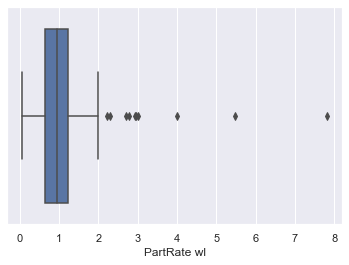

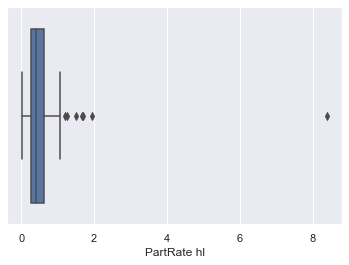

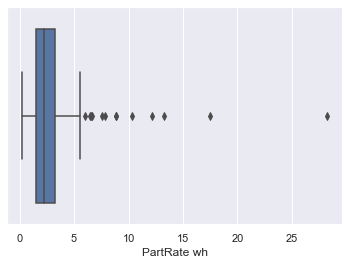

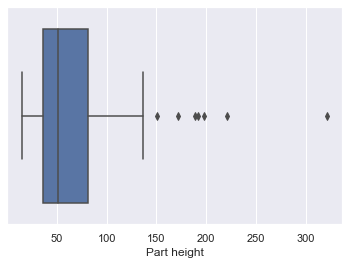

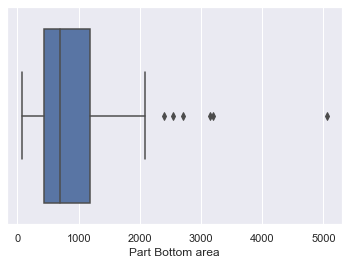

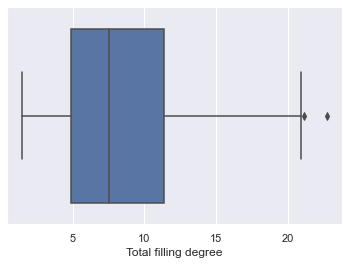

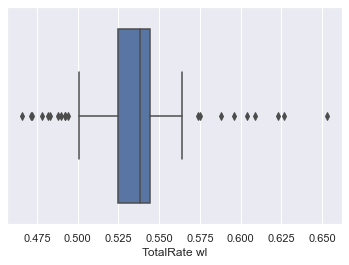

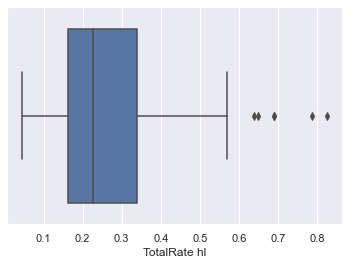

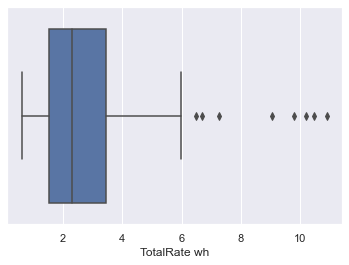

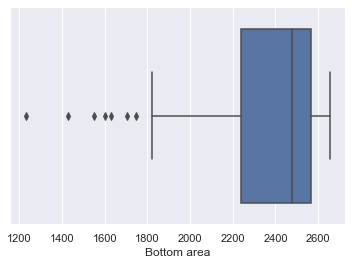

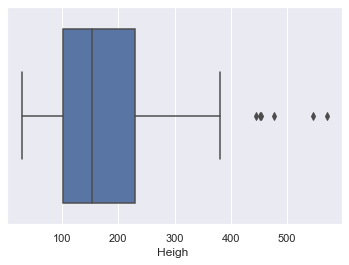

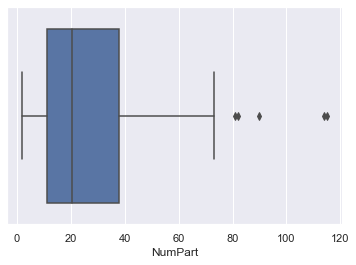

In [5]:
# outlier detection
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

In [6]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
pos_outlier= Q3+1.5*IQR
neg_outlier= Q1-1.5*IQR

In [7]:
df= df[~((df<neg_outlier)|(df>pos_outlier)).any(axis=1)]

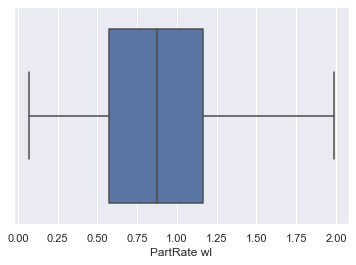

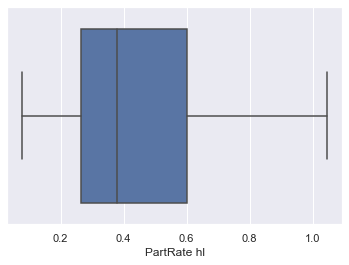

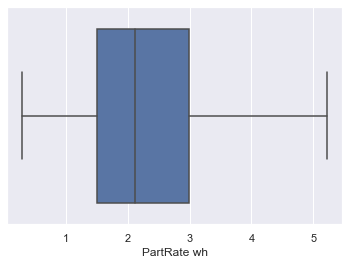

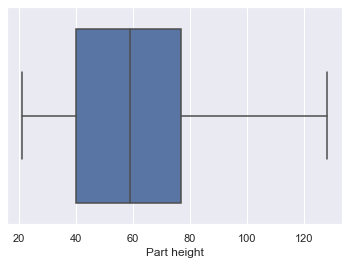

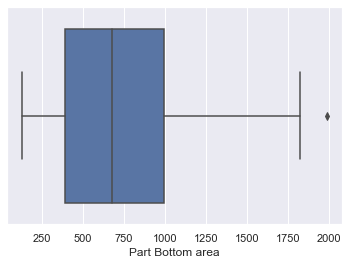

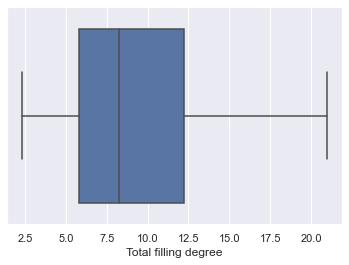

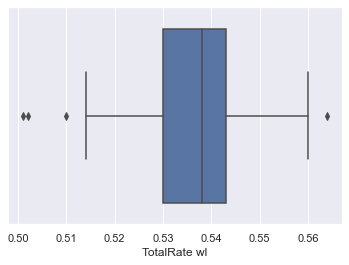

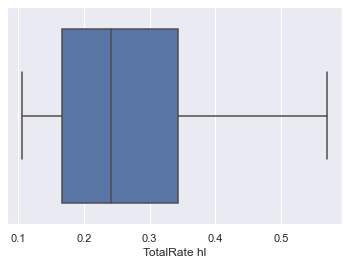

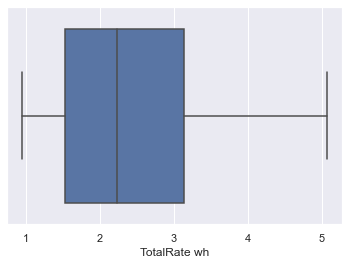

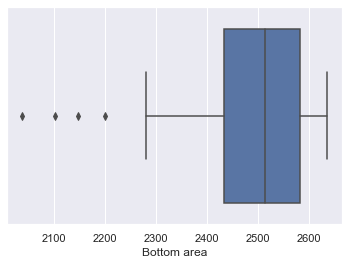

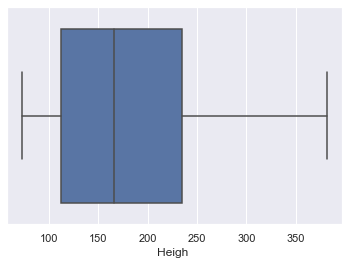

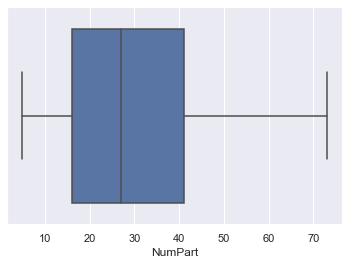

In [8]:
# outlier detection
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

<AxesSubplot:xlabel='Part filling degree', ylabel='Density'>

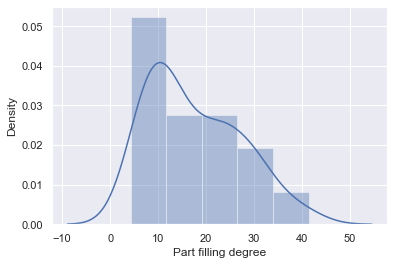

In [9]:
# Check distribution of dependent variable
sns.distplot(df['Part filling degree'])

In [10]:
df.columns

Index(['Part filling degree', 'PartRate wl', 'PartRate hl', 'PartRate wh',
       'Part height', 'Part Bottom area', 'Total filling degree',
       'TotalRate wl', 'TotalRate hl', 'TotalRate wh', 'Bottom area', 'Heigh ',
       'NumPart'],
      dtype='object')

In [11]:
x= df[['PartRate wl', 'PartRate hl', 'PartRate wh',
       'Part height', 'Part Bottom area', 'Total filling degree',
       'TotalRate wl', 'TotalRate hl', 'TotalRate wh', 'Bottom area', 'Heigh ']]
y= df[['Part filling degree']]

In [12]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [13]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x.columns
vif

,VIF,Features
0,8.207156,PartRate wl
1,9.576811,PartRate hl
2,5.102099,PartRate wh
3,4.149723,Part height
4,3.392223,Part Bottom area
5,1.438357,Total filling degree
6,4.846000,TotalRate wl
7,2458.128053,TotalRate hl
8,6.228321,TotalRate wh
9,10.895523,Bottom area


VIF>5 for PartRate wl, PartRate hl, PartRate wh, TotalRate hl, TotalRate wh, Bottom area, Heigh. We should drop them 

In [14]:
x= df[['Part height', 'Part Bottom area', 'Total filling degree',
       'TotalRate wl']]

In [15]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [16]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Part filling degree   R-squared (uncentered):                   0.860
Model:                             OLS   Adj. R-squared (uncentered):              0.844
Method:                  Least Squares   F-statistic:                              53.58
Date:                 Thu, 22 Dec 2022   Prob (F-statistic):                    1.92e-14
Time:                         16:45:35   Log-Likelihood:                         -132.76
No. Observations:                   39   AIC:                                      273.5
Df Residuals:                       35   BIC:                                      280.2
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Part height             -0.1376      0.060     -2.304      0.027      -0.259      -0.016
Part Bottom area        -0.0030      0.003     -0.880      0.385      -0.010       0.004
Total filling degree     0.7991      0.324      2.470      0.019       0.142       1.456
TotalRate wl            38.8967      7.964      4.884      0.000      22.730      55.063
==============================================================================
Omnibus:                        3.397   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.570
Skew:                           0.625   Prob(JB):                        0.277
Kurtosis:                       3.131   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p>0.05 for Part Bottom area. So, we should drop it.

In [17]:
x= df[['Part height', 'Total filling degree', 'TotalRate wl']]

In [18]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [19]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Part filling degree   R-squared (uncentered):                   0.857
Model:                             OLS   Adj. R-squared (uncentered):              0.845
Method:                  Least Squares   F-statistic:                              71.62
Date:                 Thu, 22 Dec 2022   Prob (F-statistic):                    3.02e-15
Time:                         16:46:56   Log-Likelihood:                         -133.19
No. Observations:                   39   AIC:                                      272.4
Df Residuals:                       36   BIC:                                      277.4
Df Model:                            3                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Part height             -0.1690      0.048     -3.537      0.001      -0.266      -0.072
Total filling degree     0.8338      0.320      2.605      0.013       0.185       1.483
TotalRate wl            37.7183      7.826      4.820      0.000      21.847      53.589
==============================================================================
Omnibus:                        2.803   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.998
Skew:                           0.549   Prob(JB):                        0.368
Kurtosis:                       3.150   Cond. No.                         423.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checks

|Sr.No.| Step | Requirement | Decision |
|---| --- | --- | --- |
|1| Adjusted R2 | >70 | Ok |
|2| Check p-value | <0.05 | Ok  |
|3| No heteroscadicity |  | Ok |
|4| No auto correlation | Durbin-Watson test 1.5-2.5 | Ok |
|5| No multi collinearity | VIF<5 | Ok |

In [20]:
y_Part_filling_degree= reg_model.predict(x)
df['Part filling degree predicted']= y_Part_filling_degree
df

,Part filling degree,PartRate wl,PartRate hl,PartRate wh,Part height,Part Bottom area,Total filling degree,TotalRate wl,TotalRate hl,TotalRate wh,Bottom area,Heigh,NumPart,Part filling degree predicted
0,8.996,0.100,0.079,1.267,48.395,1286.173,8.280,0.541,0.450,1.202,2585.639,311.0000,45,19.131772
1,20.317,1.294,0.673,1.923,59.242,468.536,17.022,0.553,0.264,2.096,2480.893,176.7000,59,25.040857
3,9.129,1.211,0.436,2.779,82.302,1012.383,6.892,0.528,0.528,1.000,2508.800,363.7444,41,11.754264
4,10.079,0.835,0.279,2.989,29.148,315.591,10.541,0.536,0.113,4.753,2477.000,76.6857,27,24.080965
6,24.622,0.330,0.547,0.603,89.987,864.191,10.765,0.544,0.570,0.954,2434.704,381.4096,34,14.288575
8,14.106,0.974,0.475,2.051,29.331,200.809,2.342,0.564,0.257,2.193,2518.024,171.9048,38,18.269479
12,7.814,1.036,0.222,4.676,46.106,859.766,7.477,0.536,0.106,5.066,2553.330,73.0429,10,18.660413
16,7.118,1.948,0.722,2.699,68.395,803.790,4.722,0.537,0.458,1.173,2566.860,316.4426,32,12.634374
20,30.754,0.434,0.083,5.216,40.082,1819.161,10.414,0.538,0.241,2.234,2544.425,165.5810,5,22.202815
21,18.261,0.954,0.786,1.213,89.551,389.515,13.822,0.530,0.208,2.554,2512.897,142.9217,38,16.383253


In [21]:
df.columns

Index(['Part filling degree', 'PartRate wl', 'PartRate hl', 'PartRate wh',
       'Part height', 'Part Bottom area', 'Total filling degree',
       'TotalRate wl', 'TotalRate hl', 'TotalRate wh', 'Bottom area', 'Heigh ',
       'NumPart', 'Part filling degree predicted'],
      dtype='object')

In [22]:
df_new= df[['PartRate wl', 'PartRate hl', 'PartRate wh',
       'Part height', 'Part Bottom area', 'Total filling degree',
       'TotalRate wl', 'TotalRate hl', 'TotalRate wh', 'Bottom area', 'Heigh ',
       'NumPart', 'Part filling degree predicted', 'Part filling degree']]
df_new

,PartRate wl,PartRate hl,PartRate wh,Part height,Part Bottom area,Total filling degree,TotalRate wl,TotalRate hl,TotalRate wh,Bottom area,Heigh,NumPart,Part filling degree predicted,Part filling degree
0,0.100,0.079,1.267,48.395,1286.173,8.280,0.541,0.450,1.202,2585.639,311.0000,45,19.131772,8.996
1,1.294,0.673,1.923,59.242,468.536,17.022,0.553,0.264,2.096,2480.893,176.7000,59,25.040857,20.317
3,1.211,0.436,2.779,82.302,1012.383,6.892,0.528,0.528,1.000,2508.800,363.7444,41,11.754264,9.129
4,0.835,0.279,2.989,29.148,315.591,10.541,0.536,0.113,4.753,2477.000,76.6857,27,24.080965,10.079
6,0.330,0.547,0.603,89.987,864.191,10.765,0.544,0.570,0.954,2434.704,381.4096,34,14.288575,24.622
8,0.974,0.475,2.051,29.331,200.809,2.342,0.564,0.257,2.193,2518.024,171.9048,38,18.269479,14.106
12,1.036,0.222,4.676,46.106,859.766,7.477,0.536,0.106,5.066,2553.330,73.0429,10,18.660413,7.814
16,1.948,0.722,2.699,68.395,803.790,4.722,0.537,0.458,1.173,2566.860,316.4426,32,12.634374,7.118
20,0.434,0.083,5.216,40.082,1819.161,10.414,0.538,0.241,2.234,2544.425,165.5810,5,22.202815,30.754
21,0.954,0.786,1.213,89.551,389.515,13.822,0.530,0.208,2.554,2512.897,142.9217,38,16.383253,18.261


### Conclusion
- All checks are Ok. So, Linear regression model is good for prediction.

### Final Conclusion
- Linear regression model is good for prediction of Part filling degree.